In [2]:
import os
import sys
HOME = os.path.abspath('..')
sys.path.append(HOME)
os.chdir(HOME)

In [14]:
import cv2
import itertools
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt
from PIL import Image
from src.data.dataprep_mediapipe import *
from src.features.features_extractors_mediapipe import *

In [4]:
import pandas as pd

In [210]:
detector = FaceMeshDetector(maxFaces = 1,
                            desiredFaceWidthHeight = (256,256))
detector.run_live_v2(save_faces_objs=True)

KeyboardInterrupt: 

In [87]:
for i in detector.live_faces_objs:
    f = i[0]
    t_points_2d = f['landmarks_normalized']
        
    SIZE=100
    img = np.zeros((SIZE,SIZE,3),dtype=np.uint8)
    img.fill(255)

    for (x, y) in t_points_2d:
        cv2.circle(img,
                   (int(round(x)),int(round(y))),
                   SIZE//256,
                   (0, 0, 255),
                   -1)
    cv2.imshow("Image",img)

    c = cv2.waitKey(1)
    if c == 100:
        break

In [137]:
RIGHT_EYEBROW_IDXS = extract_roi_indexes('FACEMESH_LEFT_EYEBROW')
LEFT_EYEBROW_IDXS = extract_roi_indexes('FACEMESH_RIGHT_EYEBROW')

In [251]:
a = {'a':1,'b':2}
b = {'a':10,'b':256}
c = {'a':134,'b':20}



In [254]:
dd['b']

[2, 256, 20]

In [246]:
pd.DataFrame({'mouth':[1],'eye':[2]}).quantile([0.1,0.2])

,mouth,eye
0.1,1.0,2.0
0.2,1.0,2.0


In [212]:
'''
plt.figure(figsize = (10,10))
plt.gca().invert_yaxis()
plt.scatter(i[0]['landmarks_normalized'][:,0],i[0]['landmarks_normalized'][:,1],marker='.')


c=1
for k,v in eyebrows_left_to_right_mapping.items():
    #plt.scatter(*i[0]['landmarks_normalized'][k],marker='x')
    #plt.scatter(*i[0]['landmarks_normalized'][v],marker='+')
    
    plt.text(*i[0]['landmarks_normalized'][k], str(k), color="red", fontsize=10)
    plt.text(*i[0]['landmarks_normalized'][v], str(v), color="red", fontsize=10)
    #break
    c+=1
plt.show()
'''

'\nplt.figure(figsize = (10,10))\nplt.gca().invert_yaxis()\nplt.scatter(i[0][\'landmarks_normalized\'][:,0],i[0][\'landmarks_normalized\'][:,1],marker=\'.\')\n\n\nc=1\nfor k,v in eyebrows_left_to_right_mapping.items():\n    #plt.scatter(*i[0][\'landmarks_normalized\'][k],marker=\'x\')\n    #plt.scatter(*i[0][\'landmarks_normalized\'][v],marker=\'+\')\n    \n    plt.text(*i[0][\'landmarks_normalized\'][k], str(k), color="red", fontsize=10)\n    plt.text(*i[0][\'landmarks_normalized\'][v], str(v), color="red", fontsize=10)\n    #break\n    c+=1\nplt.show()\n'

In [293]:
bac = BarycentricAsymmetryCalculator()

landmarks_sequence = [i[0]['processed_landmarks_normalized'] for i in detector.live_faces_objs]
asymmetry_index_df = bac.get_indexes_video(landmarks_sequence)
asymmetry_stats = bac.get_indexes_stats_video(asymmetry_index_df)
asymmetry_stats

,mouth,eyebrows
0.1,0.021898,0.004308
0.2,0.048008,0.006164
0.3,0.075293,0.008793
0.4,0.126210,0.024523
0.5,0.238360,0.038565
0.6,0.376499,0.051077


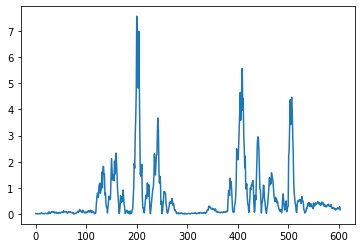

In [294]:
plt.plot(asymmetry_index_df['mouth'])
#plt.xlim(0,200)
#plt.xlim(350,650)

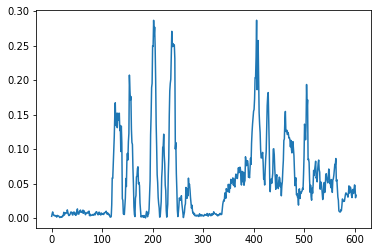

In [296]:
plt.plot(asymmetry_index_df['eyebrows'])


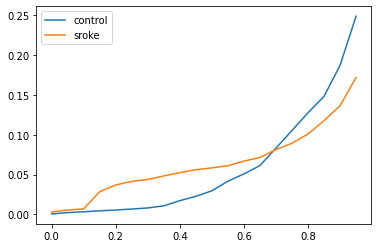

In [229]:
plt.plot(pd.Series(eyebrow_ai[100:300]).quantile(np.arange(0,1,.05)),label = 'control')
plt.plot(pd.Series(eyebrow_ai[310:550]).quantile(np.arange(0,1,.05)),label = 'sroke')
plt.legend()

In [36]:
df = pd.DataFrame([i[0]['pose'] for i in detector.live_faces_objs],columns=['pitch','yaw','roll'])

<AxesSubplot:>

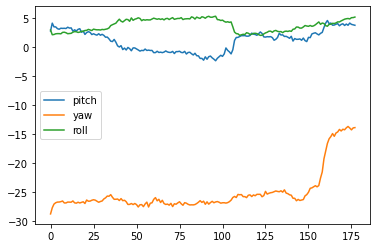

In [37]:
df.plot()

In [4]:
img=np.array(Image.open('data/dummy_data/samir/control_smile.jpeg'))

In [5]:
h,w,_ = img.shape
detector = FaceMeshDetector(frame_height=h,frame_width=w)
aligned_img,faces = detector.process(img)

In [6]:
face = faces[0]

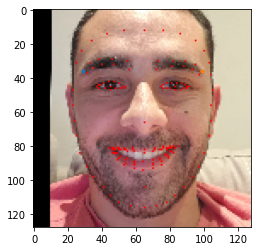

In [19]:
plt.imshow(detector.draw_faces(aligned_img,faces))
plt.scatter(*face['processed_landmarks']['left_eyebrow'][70],marker='.')
plt.scatter(*face['processed_landmarks']['right_eyebrow'][300],marker='.')

In [7]:
face['processed_landmarks']['left_eyebrow']

{65: array([46.83370213, 31.99275907]),
 66: array([46.08521813, 28.79292828]),
 70: array([29.01556459, 35.69952384]),
 105: array([38.41183809, 28.94976473]),
 107: array([54.75470117, 29.70589526]),
 46: array([31.22801882, 37.08112318]),
 52: array([39.81039379, 31.8889184 ]),
 53: array([34.70368668, 33.75308531]),
 55: array([56.0710845 , 35.00416618]),
 63: array([32.5689935 , 31.48344977])}

In [18]:
face['processed_landmarks']['right_eyebrow'][300]

array([98.80577751, 35.80695669])

In [8]:
roi = ROIExtractor(aligned_img,face['processed_landmarks'],debug=True)